# Section 3.3 2D Function Optimization with PyTorch



## Imports

In [80]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple, Dict
import warnings
warnings.filterwarnings('ignore')

## Define 2D Function and Optimization Functions

In [81]:
def f(x: torch.Tensor, y: torch.Tensor):
    """Function to minimize: f(x, y) = x^2 + y^2"""
    return x**2 + y**2

def f_maximize(x: torch.Tensor, y: torch.Tensor):
    """Function to maximize: f(x, y) = -x^2 - y^2"""
    return -(x**2 + y**2)

def optimize_2d_function(
    func,
    x0: float, y0: float, *,
    lr: float = 0.1,
    momentum: float = 0.0,
    weight_decay: float = 0.0,
    maximize: bool = False,
    num_steps: int = 100
) -> Tuple[List[float], List[float], List[float]]:
    x = torch.tensor(float(x0), requires_grad=True)
    y = torch.tensor(float(y0), requires_grad=True)

    opt = optim.SGD([x, y], lr=lr, momentum=momentum,
                    weight_decay=weight_decay, maximize=maximize)

    x_traj = [float(x.item())]
    y_traj = [float(y.item())]
    f_vals = [float(func(x, y).item())]

    for _ in range(num_steps):
        opt.zero_grad()
        val = func(x, y)
        val.backward()
        opt.step()

        x_traj.append(float(x.item()))
        y_traj.append(float(y.item()))
        f_vals.append(float(func(x, y).item()))

    return x_traj, y_traj, f_vals

## Contour Plot Function

In [82]:
def create_contour_plot(
    func, 
    x_range: Tuple[float, float] = (-3, 3), 
    y_range: Tuple[float, float] = (-3, 3),
    num_points: int = 100):
    """
    Create contour plot data for a 2D function
    """
    x = np.linspace(x_range[0], x_range[1], num_points)
    y = np.linspace(y_range[0], y_range[1], num_points)
    X, Y = np.meshgrid(x, y)
    
    
    X_torch = torch.tensor(X, dtype=torch.float32)
    Y_torch = torch.tensor(Y, dtype=torch.float32)
    Z = func(X_torch, Y_torch).numpy()
    
    return X, Y, Z

## Part (a): Vary Momentum Between 0 and 0.9

In [83]:

momentum_values = [0.0, 0.3, 0.6, 0.9]
start_point = (2.5, 2.5)
learning_rate = 0.1
num_steps = 50

print(f"Starting point: {start_point}")
print(f"Learning rate: {learning_rate}")
print(f"Number of steps: {num_steps}")

momentum_results = {}

for momentum in momentum_values:
    print(f"\nOptimizing (Minimizing) with momentum = {momentum}:")
    
    x_traj, y_traj, f_vals = optimize_2d_function(
        func=f,
        x0=start_point[0],
        y0=start_point[1],
        lr=learning_rate,
        momentum=momentum,
        num_steps=num_steps
    )
    
    momentum_results[momentum] = {
        'x_traj': x_traj,
        'y_traj': y_traj,
        'f_vals': f_vals,
        'final_value': f_vals[-1],
        'convergence_steps': len([f for f in f_vals if f < 0.01])
    }
    
    print(f"  Final function value: {f_vals[-1]:.6f}")
    print(f"  Final position: ({x_traj[-1]:.6f}, {y_traj[-1]:.6f})")
    print(f"  Steps to converge: {momentum_results[momentum]['convergence_steps']}")

Starting point: (2.5, 2.5)
Learning rate: 0.1
Number of steps: 50

Optimizing (Minimizing) with momentum = 0.0:
  Final function value: 0.000000
  Final position: (0.000036, 0.000036)
  Steps to converge: 35

Optimizing (Minimizing) with momentum = 0.3:
  Final function value: 0.000000
  Final position: (0.000000, 0.000000)
  Steps to converge: 42

Optimizing (Minimizing) with momentum = 0.6:
  Final function value: 0.000000
  Final position: (-0.000007, -0.000007)
  Steps to converge: 40

Optimizing (Minimizing) with momentum = 0.9:
  Final function value: 0.011627
  Final position: (-0.076246, -0.076246)
  Steps to converge: 3


## Plot Momentum Effects

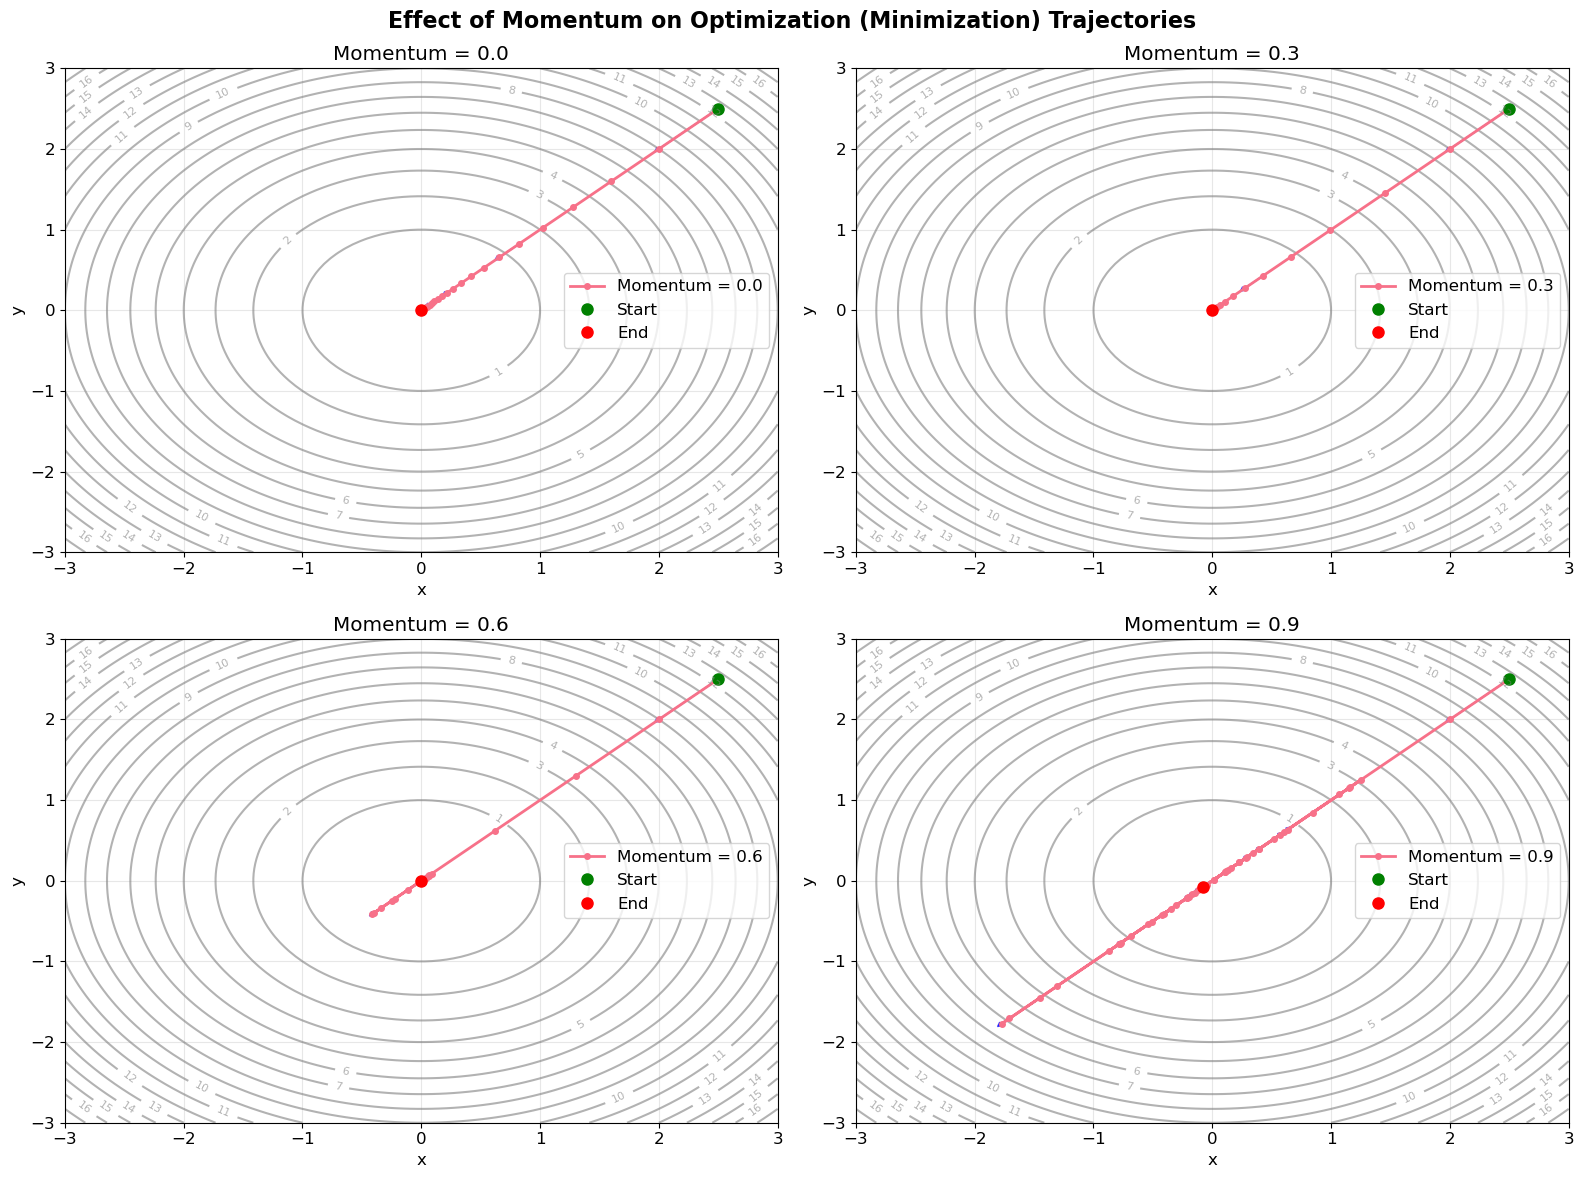

Starting point: (2.5, 2.5)
Learning rate: 0.1

Results:
Momentum  Final Value       Final Pos  Convergence
     0.0     0.000000 ( 0.000,  0.000)           35
     0.3     0.000000 ( 0.000,  0.000)           42
     0.6     0.000000 (-0.000, -0.000)           40
     0.9     0.011627 (-0.076, -0.076)            3


In [84]:
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

X, Y, Z = create_contour_plot(f, (-3, 3), (-3, 3))

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Effect of Momentum on Optimization (Minimization) Trajectories', fontsize=16, fontweight='bold')

for idx, momentum in enumerate(momentum_values):
    ax = axes[idx // 2, idx % 2]
    
    contour = ax.contour(X, Y, Z, levels=20, colors='gray', alpha=0.6)
    ax.clabel(contour, inline=True, fontsize=8)
    
   
    x_traj = momentum_results[momentum]['x_traj']
    y_traj = momentum_results[momentum]['y_traj']
    
    ax.plot(x_traj, y_traj, 'o-', linewidth=2, markersize=4, label=f'Momentum = {momentum}')
    ax.plot(x_traj[0], y_traj[0], 'go', markersize=8, label='Start')
    ax.plot(x_traj[-1], y_traj[-1], 'ro', markersize=8, label='End')
    
    for i in range(0, len(x_traj)-1, 5):
        dx = x_traj[i+1] - x_traj[i]
        dy = y_traj[i+1] - y_traj[i]
        ax.arrow(x_traj[i], y_traj[i], dx, dy, head_width=0.05, head_length=0.05, 
                fc='blue', ec='blue', alpha=0.7)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Momentum = {momentum}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)

plt.tight_layout()
plt.savefig("momentum_analysis.png", dpi=300, bbox_inches='tight')
plt.show()



print(f"Starting point: {start_point}")
print(f"Learning rate: {learning_rate}")
print(f"\nResults:")
print(f"{'Momentum':>8} {'Final Value':>12} {'Final Pos':>15} {'Convergence':>12}")
for momentum in momentum_values:
    result = momentum_results[momentum]
    print(f"{momentum:8.1f} {result['final_value']:12.6f} ({result['x_traj'][-1]:6.3f}, {result['y_traj'][-1]:6.3f}) {result['convergence_steps']:12d}")

## Part (b): Add Weight Decay

In [85]:
weight_decay = 0.1

momentum_wd_results = {}

for momentum in momentum_values:
    print(f"\nOptimizing (Minimizing) with momentum = {momentum}, weight_decay = {weight_decay}...")
    
    x_traj, y_traj, f_vals = optimize_2d_function(
        func=f,
        x0=start_point[0],
        y0=start_point[1],
        lr=learning_rate,
        momentum=momentum,
        weight_decay=weight_decay,
        num_steps=num_steps
    )
    
    momentum_wd_results[momentum] = {
        'x_traj': x_traj,
        'y_traj': y_traj,
        'f_vals': f_vals,
        'final_value': f_vals[-1],
        'final_position': (x_traj[-1], y_traj[-1]),
        'convergence_steps': len([f for f in f_vals if f < 0.01])
    }
    
    print(f"  Final function value: {f_vals[-1]:.6f}")
    print(f"  Final position: ({x_traj[-1]:.6f}, {y_traj[-1]:.6f})")
    print(f"  Steps to converge: {momentum_wd_results[momentum]['convergence_steps']}")


Optimizing (Minimizing) with momentum = 0.0, weight_decay = 0.1...
  Final function value: 0.000000
  Final position: (0.000019, 0.000019)
  Steps to converge: 35

Optimizing (Minimizing) with momentum = 0.3, weight_decay = 0.1...
  Final function value: 0.000000
  Final position: (-0.000000, -0.000000)
  Steps to converge: 42

Optimizing (Minimizing) with momentum = 0.6, weight_decay = 0.1...
  Final function value: 0.000000
  Final position: (-0.000006, -0.000006)
  Steps to converge: 39

Optimizing (Minimizing) with momentum = 0.9, weight_decay = 0.1...
  Final function value: 0.001655
  Final position: (0.028769, 0.028769)
  Steps to converge: 6


## Plot Momentum with Weight Decay

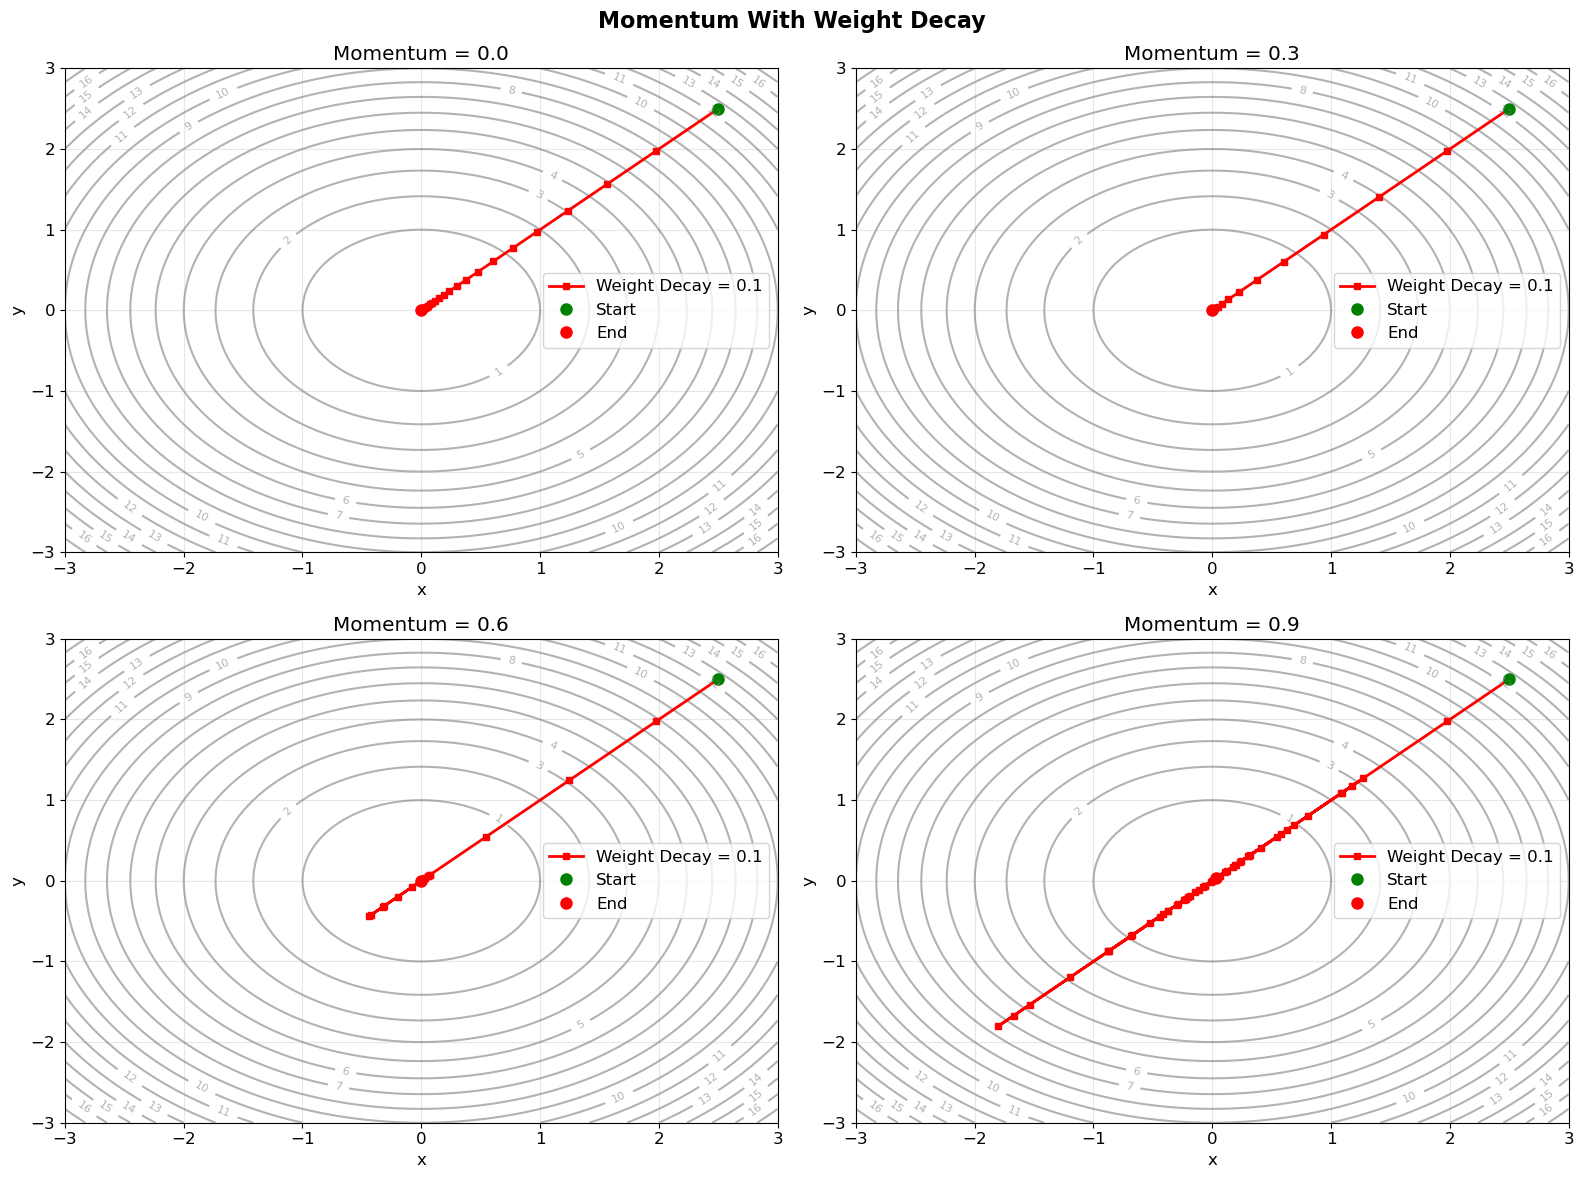

Weight decay value: 0.1
Starting point: (2.5, 2.5)
Learning rate: 0.1

Results:
Momentum  Final Value       Final Pos  Convergence
     0.0     0.000000 ( 0.000,  0.000)           35
     0.3     0.000000 (-0.000, -0.000)           42
     0.6     0.000000 (-0.000, -0.000)           39
     0.9     0.001655 ( 0.029,  0.029)            6


In [86]:

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Momentum With Weight Decay', fontsize=16, fontweight='bold')

X, Y, Z = create_contour_plot(f, (-3, 3), (-3, 3))

for idx, momentum in enumerate(momentum_values):
    ax = axes[idx // 2, idx % 2]
    
    
    contour = ax.contour(X, Y, Z, levels=20, colors='gray', alpha=0.6)
    ax.clabel(contour, inline=True, fontsize=8)
    
    
    x_traj_wd = momentum_wd_results[momentum]['x_traj']
    y_traj_wd = momentum_wd_results[momentum]['y_traj']
    ax.plot(x_traj_wd, y_traj_wd, 's-', linewidth=2, markersize=4, 
            label=f'Weight Decay = {weight_decay}', color='red')
    
    ax.plot(x_traj_wd[0], y_traj_wd[0], 'go', markersize=8, label='Start')
    ax.plot(x_traj_wd[-1], y_traj_wd[-1], 'ro', markersize=8, label='End')
    
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Momentum = {momentum}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)

plt.tight_layout()
plt.savefig("weight_decay_analysis.png", dpi=300, bbox_inches='tight')
plt.show()



print(f"Weight decay value: {weight_decay}")


print(f"Starting point: {start_point}")
print(f"Learning rate: {learning_rate}")
print(f"\nResults:")
print(f"{'Momentum':>8} {'Final Value':>12} {'Final Pos':>15} {'Convergence':>12}")
for momentum in momentum_values:
    result = momentum_wd_results[momentum]
    print(f"{momentum:8.1f} {result['final_value']:12.6f} ({result['x_traj'][-1]:6.3f}, {result['y_traj'][-1]:6.3f}) {result['convergence_steps']:12d}")


## Part (c): Try setting to Maximization

In [89]:
maximization_results = {}

for momentum in momentum_values:
    print(f"\nMaximizing with momentum = {momentum}:")
    
    x_traj, y_traj, f_vals = optimize_2d_function(
        func=f_maximize,
        x0=start_point[0],
        y0=start_point[1],
        lr=learning_rate,
        momentum=momentum,
        maximize=True,  
        num_steps=num_steps
    )
    
    maximization_results[momentum] = {
        'x_traj': x_traj,
        'y_traj': y_traj,
        'f_vals': f_vals,
        'final_value': f_vals[-1],
        'final_position': (x_traj[-1], y_traj[-1]),
        'convergence_steps': len([f for f in f_vals if f > -0.01])
    }
    
    print(f"  Final function value: {f_vals[-1]:.6f}")
    print(f"  Final position: ({x_traj[-1]:.6f}, {y_traj[-1]:.6f})")
    print(f"  Steps to converge: {maximization_results[momentum]['convergence_steps']}")
   


Maximizing with momentum = 0.0:
  Final function value: -0.000000
  Final position: (0.000036, 0.000036)
  Steps to converge: 35

Maximizing with momentum = 0.3:
  Final function value: -0.000000
  Final position: (0.000000, 0.000000)
  Steps to converge: 42

Maximizing with momentum = 0.6:
  Final function value: -0.000000
  Final position: (-0.000007, -0.000007)
  Steps to converge: 40

Maximizing with momentum = 0.9:
  Final function value: -0.011627
  Final position: (-0.076246, -0.076246)
  Steps to converge: 3


## Visualize Maximization vs Minimization

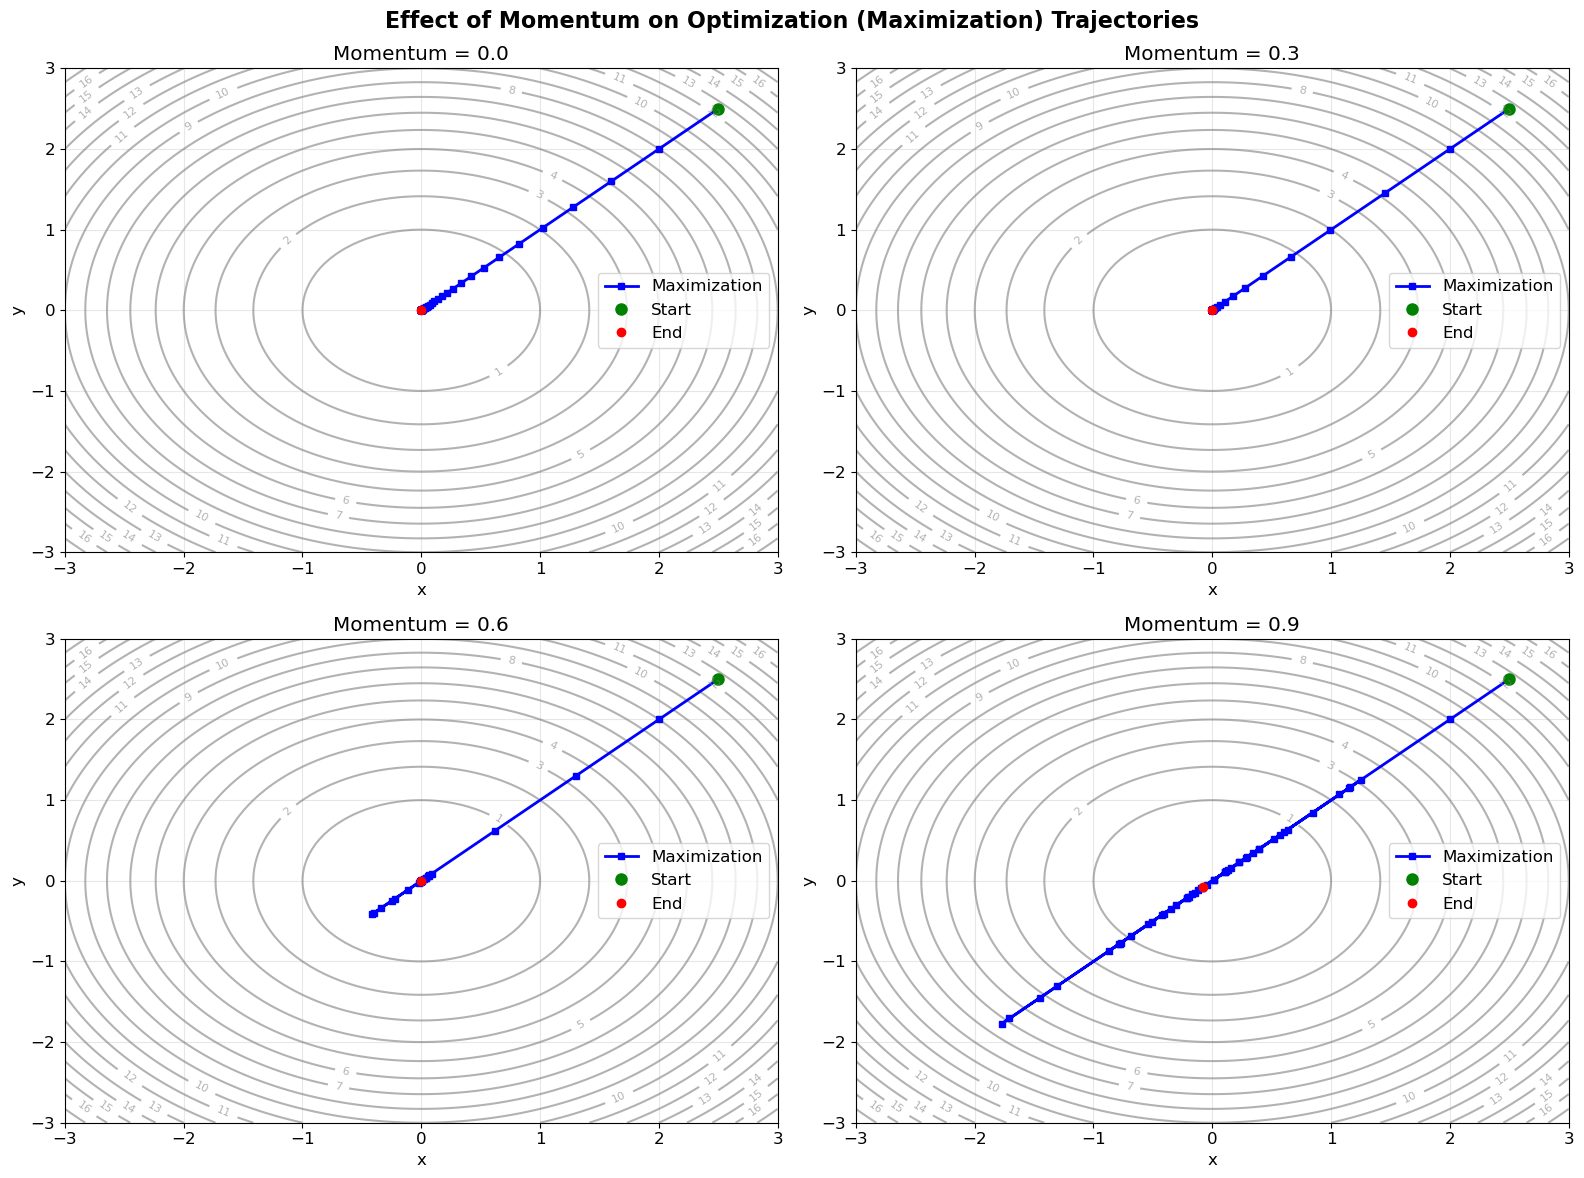

Function: f(x, y) = -x² - y² (maximization)
Starting point: (2.5, 2.5)
Learning rate: 0.1

Results:
Momentum  Final Value       Final Pos  Convergence
     0.0    -0.000000 ( 0.000,  0.000)           35
     0.3    -0.000000 ( 0.000,  0.000)           42
     0.6    -0.000000 (-0.000, -0.000)           40
     0.9    -0.011627 (-0.076, -0.076)            3


In [90]:

X_max, Y_max, Z_max = create_contour_plot(f, (-3, 3), (-3, 3))

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Effect of Momentum on Optimization (Maximization) Trajectories', fontsize=16, fontweight='bold')


for idx, momentum in enumerate(momentum_values):
    ax = axes[idx // 2, idx % 2]
    
    contour = ax.contour(X_max, Y_max, Z_max, levels=20, colors='gray', alpha=0.6)
    ax.clabel(contour, inline=True, fontsize=8)
    
    x_traj_max = maximization_results[momentum]['x_traj']
    y_traj_max = maximization_results[momentum]['y_traj']
    ax.plot(x_traj_max, y_traj_max, 's-', linewidth=2, markersize=4, 
            label=f'Maximization', color='blue')
    
    ax.plot(x_traj_max[0], y_traj_max[0], 'go', markersize=8, label='Start')
    ax.plot(x_traj_max[-1], y_traj_max[-1], 'ro', markersize=6, label='End')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Momentum = {momentum}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)

plt.tight_layout()
plt.savefig("maximization_analysis.png", dpi=300, bbox_inches='tight')
plt.show()


print(f"Function: f(x, y) = -x² - y² (maximization)")

print(f"Starting point: {start_point}")
print(f"Learning rate: {learning_rate}")
print(f"\nResults:")
print(f"{'Momentum':>8} {'Final Value':>12} {'Final Pos':>15} {'Convergence':>12}")
for momentum in momentum_values:
    result = maximization_results[momentum]
    print(f"{momentum:8.1f} {result['final_value']:12.6f} ({result['x_traj'][-1]:6.3f}, {result['y_traj'][-1]:6.3f}) {result['convergence_steps']:12d}")

# Comments and observation on each part:


part a) Minimization: Momentum = 0: Direct gradient descent, oscillatory behavior
   • Momentum = 0.3-0.6: Smoother convergence, reduced oscillations
   • Momentum = 0.9: Fast convergence but potential overshooting
   Higher momentum values lead to faster convergence but makes the gradient overshhot and scilates around the minimum before convergence

part b) Adding Weight Decay:

Adding weight decay makes convergence slower compared to not adding the weight decays. They act as regularization, preventing overfitting as well as numerical instability of the gradient steps. From the outputs and plots we can see that It has more obvious effects with higher momentum. lower momentum like 0.3 and 0.6 has identical convergence step with the no weight decay minimization run.

part c) Maximization: 
Setting maximize = True Pushes parameters inward when we flip the sign of the original function. The behavior of changing momentum is identical to minimizing the original function. This change demonstrates the importance of choosing appropriate objectives since optimization direction fundamentally changes behavior of the gradient movement. 


## Overall Interpretation of Knobs
Momentum: Controls convergence speed and stability. Low = slow but steady. High = fast but oscillatory.  
Weight Decay: Adds regularization, biases solutions toward smaller values, and damps oscillations (especially at high momentum).  
Maximize Flag: Reverses optimization direction. With convex function like f(x,y) = x^2+y^2, minimization converges inward while maximization diverges outward.